In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn import metrics
import scipy.stats as stats
from sklearn.metrics import mean_squared_error as MSE

In [34]:
data = pd.read_csv('hw5_treasury yield curve data.csv')
data.drop('Date', axis=1, inplace=True)
data.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8635 entries, 0 to 8634
Data columns (total 31 columns):
SVENF01      8353 non-null float64
SVENF02      8353 non-null float64
SVENF03      8353 non-null float64
SVENF04      8353 non-null float64
SVENF05      8353 non-null float64
SVENF06      8353 non-null float64
SVENF07      8353 non-null float64
SVENF08      8353 non-null float64
SVENF09      8353 non-null float64
SVENF10      8353 non-null float64
SVENF11      8353 non-null float64
SVENF12      8353 non-null float64
SVENF13      8353 non-null float64
SVENF14      8353 non-null float64
SVENF15      8353 non-null float64
SVENF16      8353 non-null float64
SVENF17      8353 non-null float64
SVENF18      8353 non-null float64
SVENF19      8353 non-null float64
SVENF20      8353 non-null float64
SVENF21      8353 non-null float64
SVENF22      8353 non-null float64
SVENF23      8353 non-null float64
SVENF24      8353 non-null float64
SVENF25      8353 non-null float64
SVENF26      8353 

In [36]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 0 to 8070
Data columns (total 31 columns):
SVENF01      8071 non-null float64
SVENF02      8071 non-null float64
SVENF03      8071 non-null float64
SVENF04      8071 non-null float64
SVENF05      8071 non-null float64
SVENF06      8071 non-null float64
SVENF07      8071 non-null float64
SVENF08      8071 non-null float64
SVENF09      8071 non-null float64
SVENF10      8071 non-null float64
SVENF11      8071 non-null float64
SVENF12      8071 non-null float64
SVENF13      8071 non-null float64
SVENF14      8071 non-null float64
SVENF15      8071 non-null float64
SVENF16      8071 non-null float64
SVENF17      8071 non-null float64
SVENF18      8071 non-null float64
SVENF19      8071 non-null float64
SVENF20      8071 non-null float64
SVENF21      8071 non-null float64
SVENF22      8071 non-null float64
SVENF23      8071 non-null float64
SVENF24      8071 non-null float64
SVENF25      8071 non-null float64
SVENF26      8071 

In [37]:
data.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


In [38]:
corMat = pd.DataFrame(data[['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'Adj_Close']].corr())
corMat

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,Adj_Close
SVENF01,1.000000,0.986417,0.958364,0.924637,0.890691,-0.849562
SVENF02,0.986417,1.000000,0.991325,0.971026,0.945906,-0.884194
SVENF03,0.958364,0.991325,1.000000,0.993681,0.978891,-0.898952
SVENF04,0.924637,0.971026,0.993681,1.000000,0.995480,-0.903707
SVENF05,0.890691,0.945906,0.978891,0.995480,1.000000,-0.903779
Adj_Close,-0.849562,-0.884194,-0.898952,-0.903707,-0.903779,1.000000


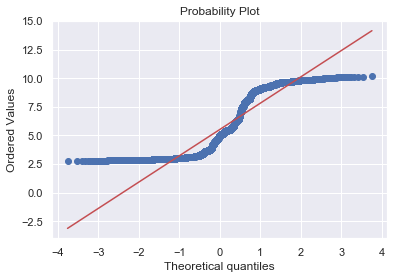

In [39]:
from scipy import stats
import matplotlib.pyplot as plt


stats.probplot(data.Adj_Close,dist="norm",plot=plt)
plt.show()

/Users/zhangxu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


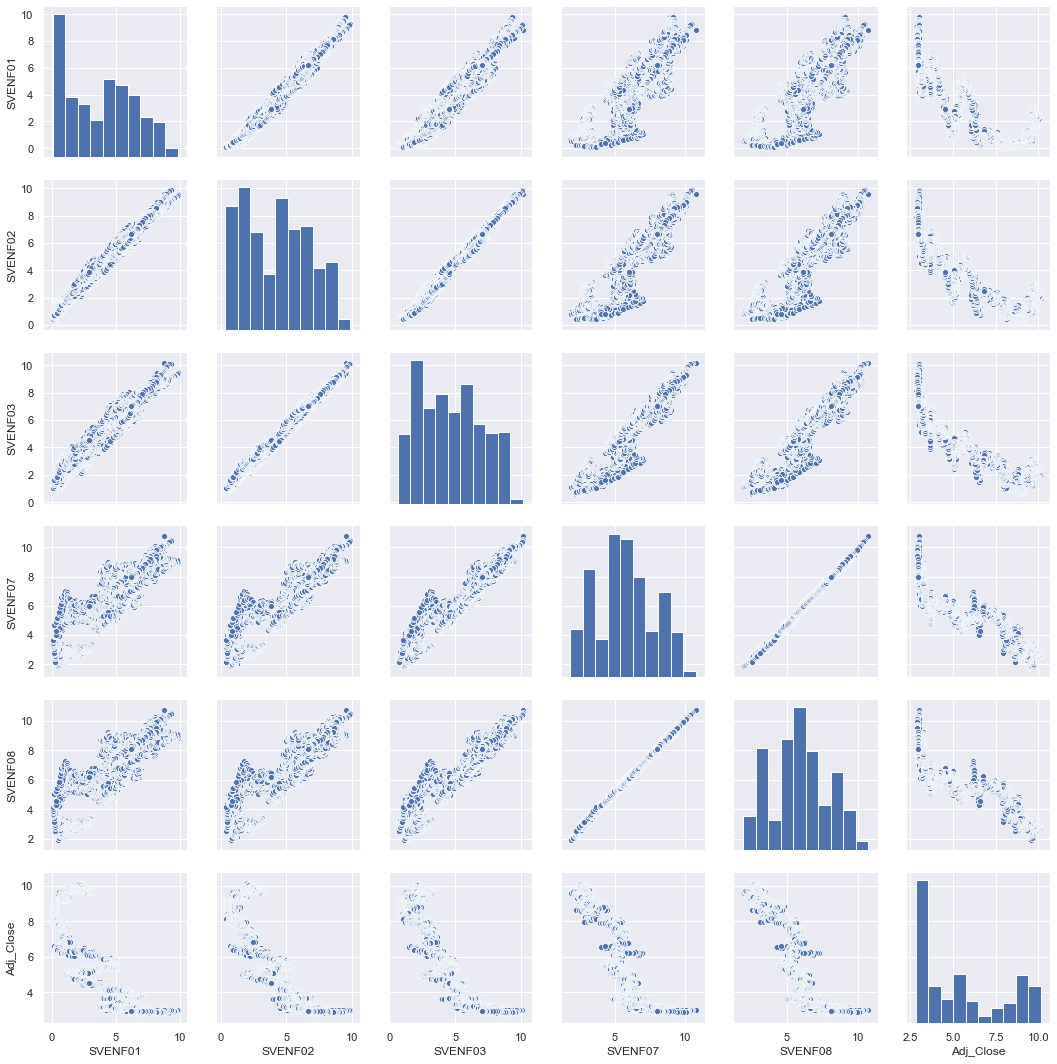

In [40]:
import seaborn as sns
cols = ['SVENF01','SVENF02','SVENF03','SVENF07','SVENF08','Adj_Close']
sns.pairplot(data[cols],size=2.5)
plt.show()

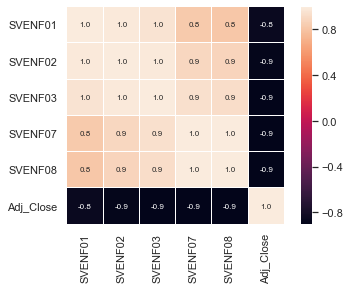

In [41]:
cm = np.corrcoef(data[['SVENF01', 'SVENF02', 'SVENF03', 'SVENF07', 'SVENF08', 'Adj_Close']].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 linewidths = 0.1,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.1f',
                 annot_kws={'size': 8},
                 yticklabels=['SVENF01', 'SVENF02', 'SVENF03', 'SVENF07', 'SVENF08', 'Adj_Close'],
                 xticklabels=['SVENF01', 'SVENF02', 'SVENF03', 'SVENF07', 'SVENF08', 'Adj_Close'])


In [42]:
# PERFROM A PCA
pca = PCA(n_components=3)
sc = StandardScaler()
X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values
X_train, X_test,y_train,y_test = train_test_split( X , y ,test_size=0.15,random_state=42)

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print('Explained variance ratio of the 3-component version: ', pca.explained_variance_ratio_)
print('Explained variance of the 3-component version: ', pca.explained_variance_)

Shape of X_train:  (6860, 30)
Shape of y_train:  (6860,)
Shape of X_test:  (1211, 30)
Shape of y_test:  (1211,)
Explained variance ratio of the 3-component version:  [0.93474555 0.04222982 0.01436836]
Explained variance of the 3-component version:  [28.04645491  1.26707935  0.43111352]


Eigenvalues: [2.79968737e+01 1.29591161e+00 4.30142311e-01 1.93875841e-01
 7.01114719e-02 8.43850576e-03 6.59338571e-04 6.87678913e-05
 6.27977347e-06 5.21905101e-07 2.66522418e-08 1.77457026e-09
 3.17139851e-10 1.73848729e-10 1.87464104e-10 2.85062376e-10
 2.80688215e-10 1.93389639e-10 2.00112317e-10 2.09939574e-10
 2.15963555e-10 2.23842055e-10 2.26593319e-10 2.29751740e-10
 2.66048339e-10 2.61496193e-10 2.57328073e-10 2.49190897e-10
 2.43471417e-10 2.45122680e-10]


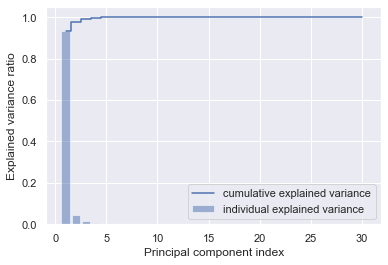

In [43]:
cov_mat = np.cov(X_test_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues:',eigen_vals)
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,31),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,31),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [44]:
#without PCA
from sklearn.svm import SVR
import time
svm = SVR()
start = time.process_time()
svm.fit(X_train, y_train)
y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)
train_score_R2_svm = svm.score(X_train,y_train)
train_RMSE_svm = np.sqrt(MSE(y_train,y_train_pred_svm))
test_score_R2_svm = svm.score(X_test,y_test)
test_RMSE_svm = np.sqrt(MSE(y_test,y_test_pred_svm))
end = time.process_time()
print('SVM train R^2 without PCA:',train_score_R2_svm,'SVM train RMSE without PCA:',train_RMSE_svm,'test R^2 without PCA:',
      test_score_R2_svm, 'test RMSE without PCA', test_RMSE_svm)
print( 'running time', end-start, 's')

/Users/zhangxu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM train R^2 without PCA: 0.9986747214302714 SVM train RMSE without PCA: 0.09632788357465492 test R^2 without PCA: 0.998651985432729 test RMSE without PCA 0.09758464904303399
running time 3.350666000000004 s


In [45]:
# Regression
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
start = time.process_time()
y_train_pred_LR = LR.predict(X_train)
y_test_pred_LR = LR.predict(X_test)
train_score_R2_LR = LR.score(X_train,y_train)
train_RMSE_LR = np.sqrt(MSE(y_train,y_train_pred_LR))
test_score_R2_LR = LR.score(X_test,y_test)
test_RMSE_LR = np.sqrt(MSE(y_test,y_test_pred_LR))
end =  time.process_time()
print('LR train R^2 without PCA:',train_score_R2_LR,'LR train RMSE without PCA:',train_RMSE_LR,'test R^2 without PCA:',
      test_score_R2_LR, 'test RMSE without PCA', test_RMSE_LR)
print( 'running time', end-start, 's')

LR train R^2 without PCA: 0.9999236691488753 LR train RMSE without PCA: 0.023117905457714666 test R^2 without PCA: 0.9999224113463206 test RMSE without PCA 0.023411719917826746
running time 0.021497999999994022 s


In [46]:
# With PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca.transform(X), y, test_size=.15, random_state=42)
print('Shape of X_train: ', X_train_pca.shape)
print('Shape of y_train: ', y_train_pca.shape)
print('Shape of X_test: ', X_test_pca.shape)
print('Shape of y_test: ', y_test_pca.shape)

Shape of X_train:  (6860, 3)
Shape of y_train:  (6860,)
Shape of X_test:  (1211, 3)
Shape of y_test:  (1211,)


In [47]:
from sklearn.svm import SVR
import time
svm = SVR()
start = time.process_time()
svm.fit(X_train_pca, y_train_pca)
y_train_pred_svm = svm.predict(X_train_pca)
y_test_pred_svm = svm.predict(X_test_pca)
train_score_R2_svm = svm.score(X_train_pca,y_train_pca)
train_RMSE_svm = np.sqrt(MSE(y_train_pca,y_train_pred_svm))
test_score_R2_svm = svm.score(X_test_pca,y_test_pca)
test_RMSE_svm = np.sqrt(MSE(y_test_pca,y_test_pred_svm))
end = time.process_time()
print('SVM train R^2 with PCA:',train_score_R2_svm,'SVM train RMSE with PCA:',train_RMSE_svm,'test R^2 with PCA:',
      test_score_R2_svm, 'test RMSE with PCA', test_RMSE_svm)
print( 'running time', end-start, 's')

/Users/zhangxu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM train R^2 with PCA: 0.9934161265528338 SVM train RMSE with PCA: 0.21470352169028 test R^2 with PCA: 0.9927744467873838 test RMSE with PCA 0.22592784701246446
running time 3.310949999999991 s


In [48]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train_pca,y_train_pca)
start = time.process_time()
y_train_pred_LR = LR.predict(X_train_pca)
y_test_pred_LR = LR.predict(X_test_pca)
train_score_R2_LR = LR.score(X_train_pca,y_train_pca)
train_RMSE_LR = np.sqrt(MSE(y_train_pca,y_train_pred_LR))
test_score_R2_LR = LR.score(X_test_pca,y_test_pca)
test_RMSE_LR = np.sqrt(MSE(y_test_pca,y_test_pred_LR))
end =  time.process_time()
print('LR train R^2 with PCA:',train_score_R2_LR,'LR train RMSE with PCA:',train_RMSE_LR,'test R^2 with PCA:',
      test_score_R2_LR, 'test RMSE with PCA', test_RMSE_LR)
print( 'running time', end-start, 's')

LR train R^2 with PCA: 0.9538022614036334 LR train RMSE with PCA: 0.5687334727896872 test R^2 with PCA: 0.9506015263470625 test RMSE with PCA 0.590732652338333
running time 0.016353999999992652 s


In [49]:
print("My name is Xu Zhang")
print("My NetID is: xuz4")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Xu Zhang
My NetID is: xuz4
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
